# Calibration of attocube stages

x stages:

In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [24]:
time.clock()

587.3601876307393

In [25]:
attocube.set_amplitude('y',10)

In [51]:
mean = []
std = []

mean_f = []
std_f = []

mean_b = []
std_b = []


voltage = [55]
for v in voltage:
    attocube.set_amplitude('x',v)
    attocube.set_frequency('x',1000)
    x_pos = attocube.get_scanner_position_abs()[1]*1e9
    xpos = [x_pos]

    for i in range(5):
        attocube.set_amplitude('x',v)
        for k in range(5):
            time.sleep(0.1)
            attocube.single_step('x','forward')
        time.sleep(1)
        xpos.append(attocube.get_scanner_position_abs()[1]*1e9)
        
        attocube.set_amplitude('x',v+5)
        for j in range(5):
            time.sleep(0.1)
            attocube.single_step('x','backward')
        time.sleep(1)
        xpos.append(attocube.get_scanner_position_abs()[1]*1e9)    
    
    step_sizes = np.abs(np.diff(xpos))
    step_sizes_f = np.abs(np.diff(xpos[0:5]))
    step_sizes_b = np.abs(np.diff(xpos[5:10]))

    mean.append(step_sizes.mean())
    std.append(step_sizes.std())
    
    mean_f.append(step_sizes_f.mean())
    std_f.append(step_sizes_f.std())
    
    mean_b.append(step_sizes_b.mean())
    std_b.append(step_sizes_b.std())
    


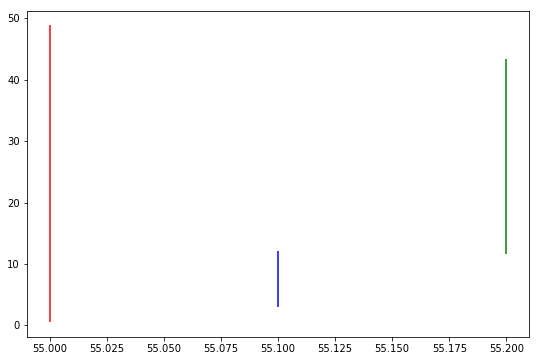

In [52]:
#plt.plot(step_sizes)
voltage1=[voltage[0] + 0.1]
voltage2=[voltage[0] + 0.2]
plt.errorbar(voltage,mean,std, color='red')
plt.errorbar(voltage1,mean_f,std_f,color='blue')
plt.errorbar(voltage2,mean_b,std_b, color='green')
plt.show()

In [14]:
mynicard2.close_scanner()
mynicard2.close_scanner_clock()

Traceback (most recent call last):
  File "C:\software\Qudi -Rasmus\logic\jupyterkernel\qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-5af97a911a1a>", line 1, in <module>
    mynicard2.close_scanner()
NameError: name 'mynicard2' is not defined


In [2]:
mynicard2.set_up_scanner_clock(clock_frequency=10)
mynicard2.set_up_scanner()

0

In [3]:
x = np.linspace(0,5,5)
x_b = np.linspace(5,0,5)
y = np.linspace(0,0,5)
z = np.linspace(0,0,5)
counts = np.zeros_like(x)

line= np.array([x,y,z,counts])
line_back= np.array([x_b,y,z,counts])


In [5]:
mean = []
std = []

mean_f = []
std_f = []

mean_b = []
std_b = []


voltage = [5,10,15,20,25,30,35,40,45,50,55,60]
voltage = [5,10]
for v in voltage:
    attocube.set_amplitude('x',v)
    attocube.set_frequency('x',1000)
    x_pos = attocube.get_scanner_position_abs()[1]*1e6
    xpos = [x_pos]

    for i in range(5):
        mynicard2.scan_line(line)
        time.sleep(1)
        xpos.append(attocube.get_scanner_position_abs()[1]*1e6)
        
    
        mynicard2.scan_line(line_back)
        time.sleep(1)
        xpos.append(attocube.get_scanner_position_abs()[1]*1e6)    
    
    step_sizes = np.abs(np.diff(xpos))
    step_sizes_f = np.abs(np.diff(xpos[0:5]))
    step_sizes_b = np.abs(np.diff(xpos[5:10]))

    mean.append(step_sizes.mean())
    std.append(step_sizes.std())
    
    mean_f.append(step_sizes_f.mean())
    std_f.append(step_sizes_f.std())
    
    mean_b.append(step_sizes_b.mean())
    std_b.append(step_sizes_b.std())
    

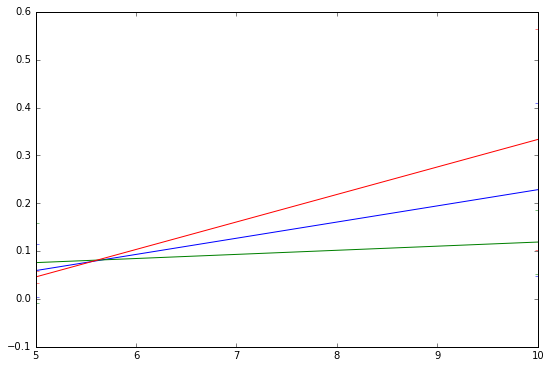

In [10]:
plt.errorbar(voltage,mean,std)
plt.errorbar(voltage,mean_f,std_f)
plt.errorbar(voltage,mean_b,std_b)
plt.show()

In [6]:
mynicard2.scan_line(line)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [7]:
mynicard2.scan_line(line_back)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])